# Exercise 15-1: More analysis of the Curry data - Solution

## Get the data

In [1]:
import pandas as pd
import seaborn as sns
import json

In [2]:
with open('../../../data/shots.json') as jsonData:
    shots = json.load(jsonData)
columnHeaders = [x.lower() for x in shots['resultSets'][0]['headers']]
rows = shots['resultSets'][0]['rowSet']
shots = pd.DataFrame(data=rows, columns=columnHeaders)

In [3]:
shots.head()

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,0020900015,4,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,25,...,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028,GSW,HOU
1,Shot Chart Detail,0020900015,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,31,...,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028,GSW,HOU
2,Shot Chart Detail,0020900015,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,2,...,Center(C),8-16 ft.,14,-60,129,1,0,20091028,GSW,HOU
3,Shot Chart Detail,0020900015,141,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,49,...,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028,GSW,HOU
4,Shot Chart Detail,0020900015,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,19,...,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028,GSW,HOU


## Clean the data

In [4]:
shots = shots.drop(columns=['grid_type','game_event_id','player_id','player_name',
                            'team_id','team_name','minutes_remaining','seconds_remaining',
                            'htm','vtm'])

In [5]:
shots.head()

,game_id,period,event_type,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date
0,0020900015,1,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028
1,0020900015,1,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028
2,0020900015,1,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,1,0,20091028
3,0020900015,2,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028
4,0020900015,2,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028


In [6]:
shots.period.value_counts()

period
3    3541
1    3501
2    2502
4    2209
5      90
6       3
Name: count, dtype: int64

In [7]:
shots = shots.query('period < 5')

## Prepare and analyze the data

In [8]:
shots.action_type.nunique()

51

In [9]:
shots.action_type.value_counts()

action_type
Jump Shot                             5802
Pullup Jump shot                      1694
Step Back Jump shot                    755
Driving Layup Shot                     635
Layup Shot                             537
Floating Jump shot                     387
Driving Finger Roll Layup Shot         324
Running Jump Shot                      209
Driving Reverse Layup Shot             165
Running Layup Shot                     131
Cutting Layup Shot                     119
Jump Bank Shot                         108
Reverse Layup Shot                     102
Fadeaway Jump Shot                      90
Turnaround Jump Shot                    89
Driving Floating Jump Shot              83
Running Bank shot                       61
Running Finger Roll Layup Shot          51
Running Pull-Up Jump Shot               44
Finger Roll Layup Shot                  36
Driving Bank shot                       36
Driving Floating Bank Jump Shot         34
Running Reverse Layup Shot              33

In [10]:
# Steps:
# pick common substring
# add actions that the substring covers to list
# query the shots for the actions until empty

commonSubstrings = ['Jump','Layup','Dunk','Fadeaway','Hook','Bank','Tip']
actions = shots[shots.action_type.str.contains('|'.join(commonSubstrings))].action_type.to_list()
shots.query('action_type not in @actions').action_type

Series([], Name: action_type, dtype: object)

In [11]:
# replace each shot type with the new label
def get_label(row):
     for s in commonSubstrings:
         if s in row.action_type:
             return s

In [12]:
shots['shot_type'] = shots.apply(lambda x: get_label(x), axis=1)

## Plot the data

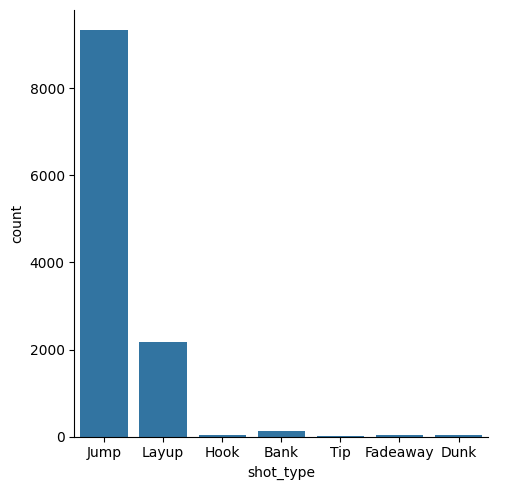

In [13]:
sns.catplot(data=shots, kind='count', x='shot_type')

In [14]:
# SOURCE: http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

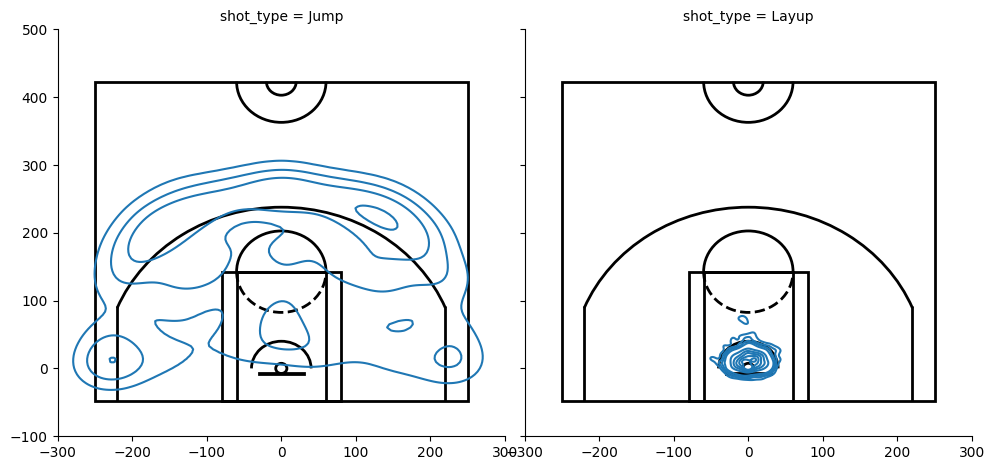

In [15]:
g = sns.displot(data=shots.query('shot_type in ["Jump","Layup"]'), kind='kde', 
    x='loc_x', y='loc_y', col='shot_type', col_wrap=2)

for i, ax in enumerate(g.axes.flat):
    ax = draw_court(ax, outer_lines=True)
    ax.set_xlim(-300,300)
    ax.set_ylim(-100, 500)
    ax.set(ylabel='', xlabel='')